In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

%matplotlib inline
sns.set_style("whitegrid")

In [66]:
df = pd.DataFrame.from_csv("mst_sizes_largest.csv", index_col=None)

In [67]:
df.shape

(856, 5)

In [68]:
summary = df.groupby(["Nodes", "Dimension"]).mean().reset_index()

In [83]:
summary.to_csv("mst_summary.csv", index=False)

### Looking at MST size as a function of $n, d$

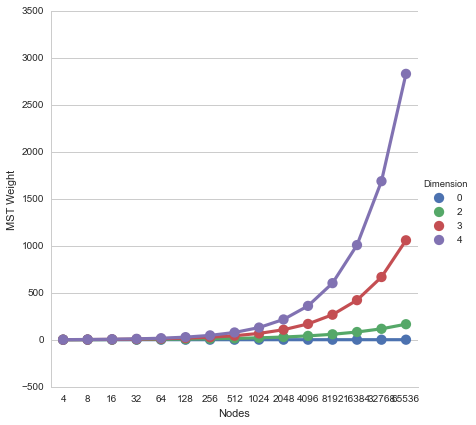

In [70]:
sns.factorplot(x="Nodes", y="Size", data=df, hue="Dimension", size=6)
plt.ylabel("MST Weight")

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]


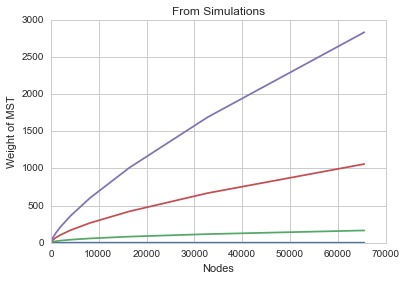

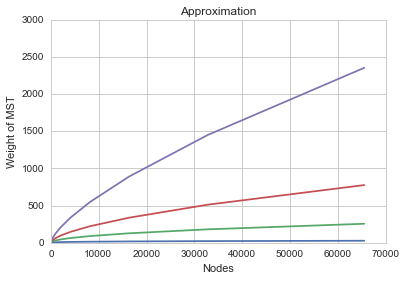

In [86]:
x = list(summary[summary.Dimension == 4].Nodes)
y0 = list(summary[summary.Dimension == 0].Size)
y2 = list(summary[summary.Dimension == 2].Size)
y3 = list(summary[summary.Dimension == 3].Size)
y4 = list(summary[summary.Dimension == 4].Size)

print x


def func(n, dims):
#     return math.log(math.pow(x, n), n+2)
#     return math.log(n, 1.0 + 1.0/(math.pow(dims, 2)+1))
    return math.pow(n, (3.0+dims)/10.0)

yf0 = [func(n,0) for n in x]
yf2 = [func(n,2) for n in x]
yf3 = [func(n,3) for n in x]
yf4 = [func(n,4) for n in x]


plt.plot(x, y0, x, y2, x, y3, x, y4,)
plt.xlabel("Nodes")
plt.ylabel("Weight of MST")
plt.title("From Simulations")
plt.ylim([0, 3000])
plt.show()

plt.plot(x, yf0, x, yf2, x, yf3, x, yf4,)
plt.xlabel("Nodes")
plt.ylabel("Weight of MST")
plt.title("Approximation")
plt.ylim([0, 3000])
plt.show()

It looks like our function of $n, dims$ is something of the form:
$$f(n, d) = cn^{kd}$$
Where $k$ makes the exponent some value less than 1.
The function shown above in the approximation is:
$$f(n, d) = n^{(3+d)/10}$$

In [94]:
summary["Estimated"] = np.vectorize(func)(summary['Nodes'], summary['Dimension'])

In [96]:
summary.to_csv("mst_summary.csv", index=False)

### Looking at $k(n)$ for Krusgal's
It could be useful to know what value edges are not needed in our MST for krudgal's algorithm because then we do not need to sor out all of the edges. Here we try to estimate the funciton $k(n,d)$ for the largest edge weight in the MST.

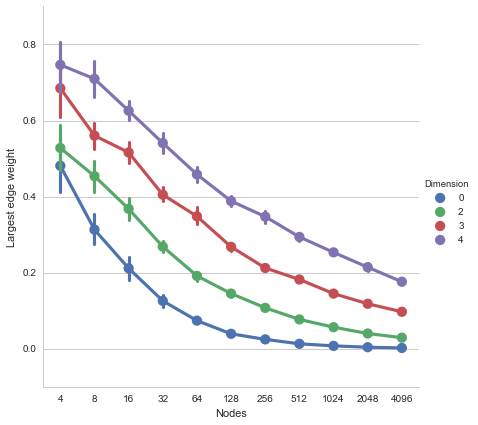

In [108]:
sns.factorplot(x="Nodes", y="Largest", data=df, hue="Dimension", size=6)
plt.ylabel("Largest edge weight")

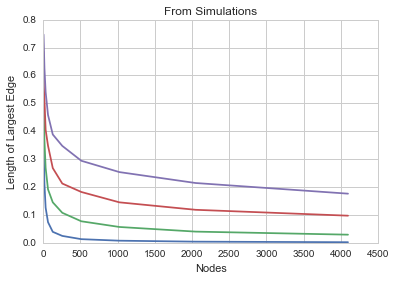

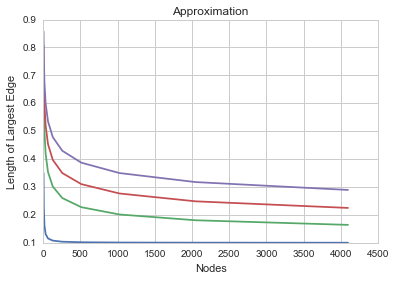

In [107]:
x = list(summary[summary.Dimension == 4].Nodes)
y0 = list(summary[summary.Dimension == 0].Largest)
y2 = list(summary[summary.Dimension == 2].Largest)
y3 = list(summary[summary.Dimension == 3].Largest)
y4 = list(summary[summary.Dimension == 4].Largest)


def func(x, k, n):
    return float(k)/(x**n) + .1

yf0 = [func(n, 1, 1.0) for n in x]
yf2 = [func(n, 1, .33) for n in x]
yf3 = [func(n, 1, .25) for n in x]
yf4 = [func(n, 1, .20) for n in x]



plt.plot(x, y0, x, y2, x, y3, x, y4)
plt.xlabel("Nodes")
plt.ylabel("Length of Largest Edge")
plt.title("From Simulations")
plt.show()
plt.plot(x, yf0, x, yf2, x, yf3, x, yf4)
plt.xlabel("Nodes")
plt.ylabel("Length of Largest Edge")
plt.title("Approximation")
plt.show()

It looks like our approximation (for dimension == 4) is something like 
$$ k(n) = 1/n^{1/5}$$

for a $d$-dimensional space, for input size $n$, we have:
$$k(n, d) = n^{-1/(d+1)}$$